<a href="https://colab.research.google.com/github/ACSouzaJr/Expectation-Maximization/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means & Gaussian Mixture (Expectation-Maximization) Comparison

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, silhouette_score
from scipy.stats import mode

%matplotlib inline

In [ ]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y_train = pd.DataFrame(iris.target)
y_train.columns = ['Targets']

In [ ]:
from sklearn import preprocessing

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

X_train = pd.DataFrame(scaled_X, columns = X.columns)

Text(0, 0.5, 'Petal Width')

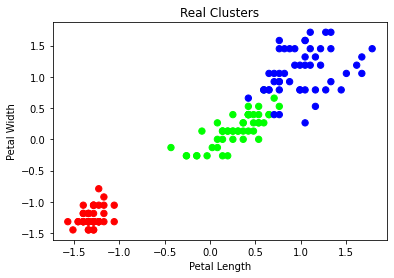

In [ ]:
colormap = np.array(['red', 'lime', 'blue'])

# Plot the Original Classifications using Petal features
plt.scatter(X_train.Petal_Length, X_train.Petal_Width, c = colormap[y_train.Targets], s=40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Feature 2')

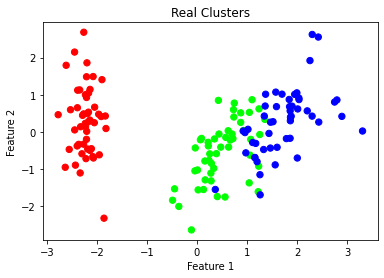

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_train)

Z = pd.DataFrame(data=components)

# Plot the Original Classifications using PCA
plt.scatter(Z[0], Z[1], c = colormap[y_train.Targets], s=40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('Real Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## K-Means

In [ ]:
from sklearn.cluster import KMeans

n_clusters=3
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(X_train)

In [ ]:
# Change labels to use same color
labels = np.zeros_like(clusters)

for i in range(n_clusters):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_train, labels)
print("Average silhouette_score = ", silhouette_avg)
print('Accuracy = ', acc)

Average silhouette_score =  0.45994823920518635
Accuracy =  0.8333333333333334


Text(0, 0.5, 'Petal Width')

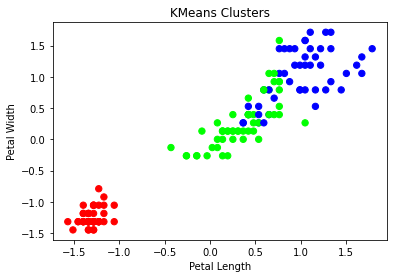

In [ ]:
# Plot KNN classification
plt.scatter(X_train.Petal_Length, X_train.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Feature 2')

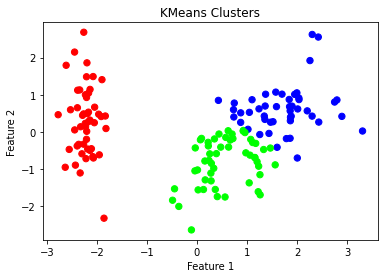

In [ ]:
# Plot KNN classification using PCA
plt.scatter(Z[0], Z[1], c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=n_clusters)
y = gm.fit_predict(X_train)

In [ ]:
# Change labels to use same color
labels = np.zeros_like(clusters)

for i in range(n_clusters):
    cat = (y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
silhouette_avg = silhouette_score(X_train, labels)
print("Average silhouette_score = ", silhouette_avg)
print("Accuracy using GMM = ", acc)

Average silhouette_score =  0.37416491866541235
Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Petal Width')

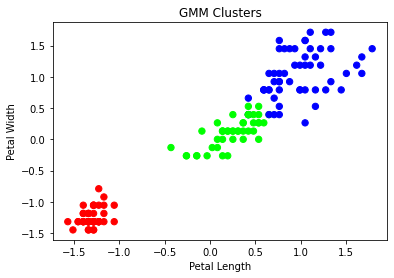

In [ ]:
# Plot GMM classification
plt.scatter(X_train.Petal_Length, X_train.Petal_Width, c = colormap[labels], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Feature 2')

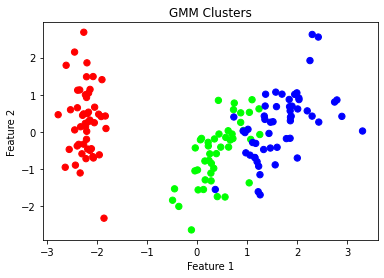

In [ ]:
# Plot GMM classification using PCA
plt.scatter(Z[0], Z[1], c = colormap[labels], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Referências

- https://github.com/geeksnome/machine-learning-made-easy/blob/master/em_kmeans.py
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60